In [37]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

from datetime import datetime
import airportsdata
import plotly.figure_factory as ff
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [36]:
data=pd.read_csv('productsall2006snr5132022.csv')

In [4]:
data

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,withinshare,AAAS,CODLNW,UAUS,mAAAS,mCODLNW,mUAUS,mc6,delta,mk_tco
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,0.494055,0,1,0,0,1,1,71.437893,-5.399169,1
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,0.092213,0,0,0,0,1,1,73.498577,-7.077718,1
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,0.004197,0,0,1,0,1,1,110.735613,-10.167497,1
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,0.018652,1,0,0,0,1,1,65.747636,-8.675842,1
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,0.000117,1,0,0,0,1,1,107.835136,-13.751016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,DCA,ICT,NW,CO,1215,2r,129.500000,7,MEM,0,...,0.025830,0,1,0,0,1,0,23.833432,-10.345526,1
261306,DCA,ICT,NW,DL,1215,2r,129.000000,2,MEM,0,...,0.007380,0,1,0,0,1,0,21.054109,-11.598289,1
261307,DCA,ICT,NW,NW,1215,2r,160.592105,38,MEM,1,...,0.140221,0,1,0,0,1,0,49.859511,-8.653850,1
261308,DCA,ICT,NW,NW,1476,2r,156.062500,8,MSP,1,...,0.029520,0,1,0,0,1,0,45.329906,-10.211994,1


In [31]:
#get the location of each airports
airports =airportsdata.load('IATA')
airports =pd.DataFrame(airports)
airports=airports.transpose()
#airports=airports[['iata','lat','lon']]
airports

,icao,iata,name,city,subd,country,elevation,lat,lon,tz
ICY,19AK,ICY,Icy Bay Airport,Icy Bay,Alaska,US,50.0,59.969002,-141.662003,America/Anchorage
HGZ,2AK6,HGZ,Hog River Airport,Hogatza,Alaska,US,534.0,66.216103,-155.669006,America/Anchorage
BYW,38WA,BYW,Blakely Island Airport,Blakely Island,Washington,US,66.0,48.578999,-122.825996,America/Los_Angeles
BDF,3IS8,BDF,Rinkenberger Restricted Landing Area,Bradford,Illinois,US,808.0,41.2309,-89.6157,America/Chicago
BCS,65LA,BCS,Southern Seaplane Airport,Belle Chasse,Louisiana,US,0.0,29.8661,-90.022202,America/Chicago
...,...,...,...,...,...,...,...,...,...,...
DLC,ZYTL,DLC,Zhoushuizi Airport,Dalian,Liaoning,CN,107.0,38.965698,121.539001,Asia/Shanghai
TNH,ZYTN,TNH,Tonghua Sanyuanpu Airport,Tonghua,Jilin,CN,1200.0,42.253889,125.703333,Asia/Shanghai
SHE,ZYTX,SHE,Taoxian Airport,Shenyang,Liaoning,CN,198.0,41.639801,123.483002,Asia/Shanghai
XEN,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30.0,40.580299,120.697998,Asia/Shanghai


In [24]:
data_2=data.merge(airports, left_on='Origin',right_on='iata')
data_2.rename(columns = {'lat':'Origin_lat', 'lon':'Origin_lon'}, inplace = True)
data_2

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,UAUS,mAAAS,mCODLNW,mUAUS,mc6,delta,mk_tco,iata,Origin_lat,Origin_lon
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,0,0,1,1,71.437893,-5.399169,1,LAX,33.942501,-118.407997
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,0,0,1,1,73.498577,-7.077718,1,LAX,33.942501,-118.407997
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,1,0,1,1,110.735613,-10.167497,1,LAX,33.942501,-118.407997
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,0,0,1,1,65.747636,-8.675842,1,LAX,33.942501,-118.407997
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,0,0,1,1,107.835136,-13.751016,1,LAX,33.942501,-118.407997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,DAL,ELP,WN,WN,565,2r,204.500000,1,MAF,1,...,0,0,0,0,58.124837,-12.249573,0,DAL,32.847099,-96.851799
261306,DAL,ELP,WN,WN,744,2r,139.500000,7,SAT,1,...,0,0,0,0,-6.875163,-10.303663,0,DAL,32.847099,-96.851799
261307,DAL,TUL,WN,WN,237,1r,92.767668,1698,1,1,...,0,0,0,0,-58.217366,-4.923875,0,DAL,32.847099,-96.851799
261308,DAL,LIT,WN,WN,296,1r,86.982877,1752,1,1,...,0,0,0,0,-67.343926,-4.737532,0,DAL,32.847099,-96.851799


In [26]:
data_2=data_2.merge(airports, left_on='Dest',right_on='iata')
data_2.rename(columns = {'lat':'Dest_lat', 'lon':'Dest_lon'}, inplace = True)
data_2

,Origin,Dest,Up,Down,Distance,fs,Price,quantity,Connecting,Newonline,...,mUAUS,mc6,delta,mk_tco,iata_x,Origin_lat,Origin_lon,iata_y,Dest_lat,Dest_lon
0,LAX,ATL,DL,DL,1946,1r,224.755073,4238,1,1,...,1,71.437893,-5.399169,1,LAX,33.942501,-118.407997,ATL,33.6367,-84.428101
1,LAX,ATL,FL,FL,1946,1r,177.977876,791,1,1,...,1,73.498577,-7.077718,1,LAX,33.942501,-118.407997,ATL,33.6367,-84.428101
2,LAX,ATL,US,US,1946,1r,214.361111,36,1,1,...,1,110.735613,-10.167497,1,LAX,33.942501,-118.407997,ATL,33.6367,-84.428101
3,LAX,ATL,AA,AA,1967,2r,168.412500,160,DFW,1,...,1,65.747636,-8.675842,1,LAX,33.942501,-118.407997,ATL,33.6367,-84.428101
4,LAX,ATL,AA,AA,2937,2r,210.500000,1,MIA,1,...,1,107.835136,-13.751016,1,LAX,33.942501,-118.407997,ATL,33.6367,-84.428101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261305,SMF,LGB,B6,B6,387,1r,80.690258,1201,1,1,...,0,-21.478788,-6.160274,0,SMF,38.6954,-121.591003,LGB,33.817699,-118.152
261306,SMF,LGB,US,US,1002,2r,167.500000,3,PHX,1,...,0,67.584847,-12.152571,0,SMF,38.6954,-121.591003,LGB,33.817699,-118.152
261307,SMF,LGB,B6,B6,387,1r,80.944378,1681,1,1,...,0,-22.663103,-5.830463,0,SMF,38.6954,-121.591003,LGB,33.817699,-118.152
261308,SMF,LGB,US,US,1002,2r,215.500000,2,PHX,1,...,0,115.580484,-12.564460,0,SMF,38.6954,-121.591003,LGB,33.817699,-118.152


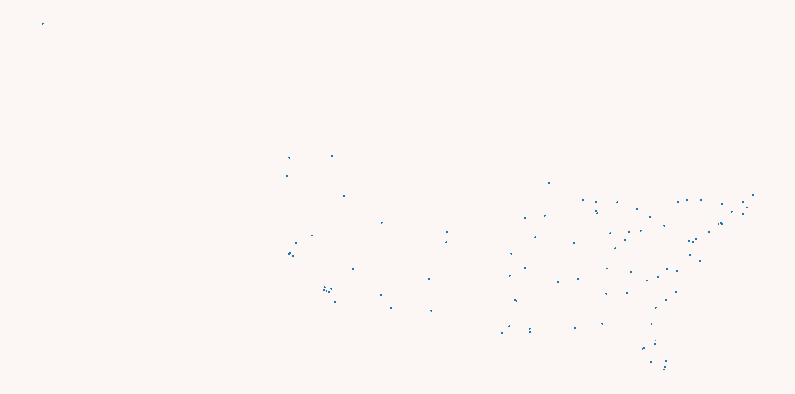

In [29]:
fig, ax =plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14,7)

ax.scatter(data_2['Origin_lon'],data_2['Origin_lat'],s=1,edgecolors='none')
ax.axis('off')
plt.show()

In [ ]:
usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
